## Hands-on Lab: Introduction to Matplotlib and Line Plots

Import required modules

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

Let's set Country as the index, it will help you to plot the charts easily, by refering to the country names as index value

In [29]:
df_can.set_index('Country', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()

Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of years:

In [30]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))

### Visualizing Data using Matplotlib

#### Matplotlib: Standard Python Visualization Library

Question: Plot a line graph of immigration from Haiti using df.plot().

In [31]:
#Since we converted the years to string, 
#let's declare a variable that will allow us to easily call upon the full range of years:
years = list(map(str, range(1980, 2014)))
#creating data series
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

<Axes: >

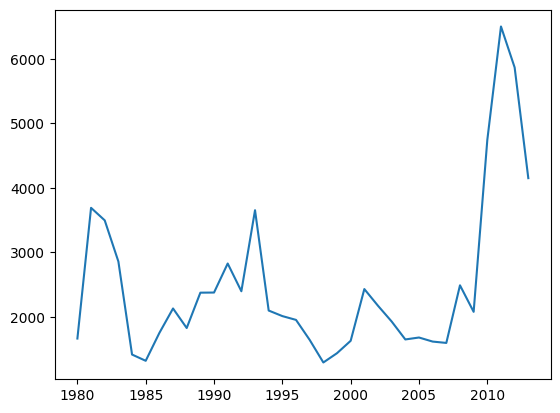

In [32]:
haiti.plot()

Also, let's label the x and y axis using plt.title(), plt.ylabel(), and plt.xlabel() as follows:

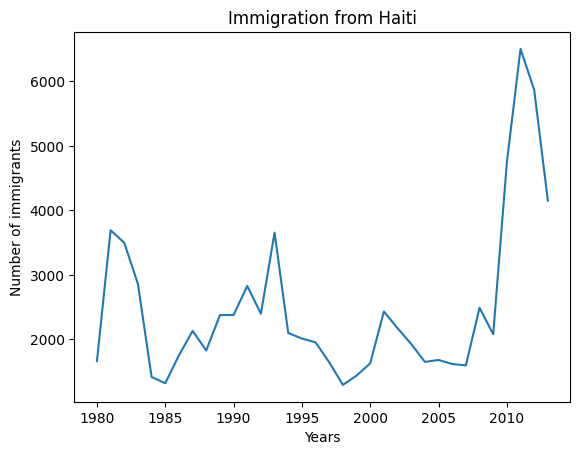

In [33]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

However, notice that years are of type string. Let's change the type of the index values to integer first.

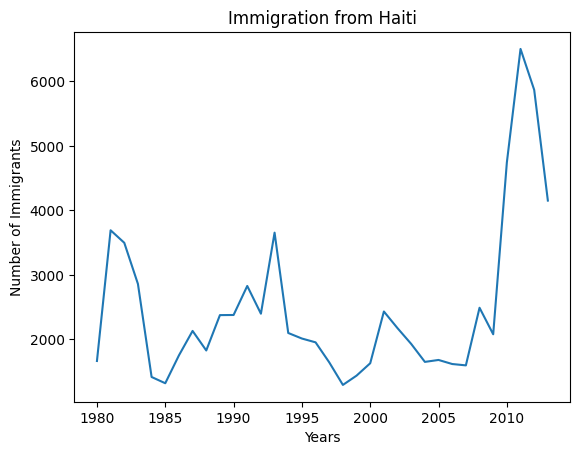

In [35]:
haiti.index = haiti.index.map(int) 
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show() 

**Question:** Let's compare the number of immigrants from India and China from 1980 to 2013.

In [41]:
india_china = df_can.loc[["China", "India"], years]
india_china

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


In [43]:
india_china = india_china.transpose()
india_china

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704
1985,1816,4211
1986,1960,7150
1987,2643,10189
1988,2758,11522
1989,4323,10343


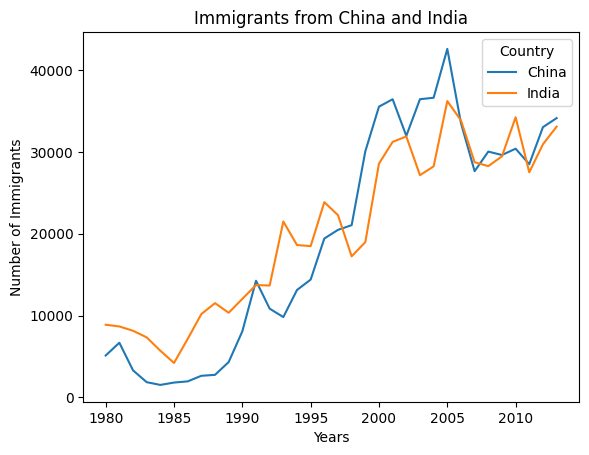

In [45]:
india_china.index = india_china.index.map(int) # let's change the index values of india_china to type integer for plotting
india_china.plot(kind='line')

plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

***Question***: Compare the trend of top 5 countries that contributed the most to immigration to Canada.

In [50]:
df_can.sort_values(by="Total", ascending=False, axis=0, inplace=True)
df_can["Total"].head()

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
Name: Total, dtype: int64

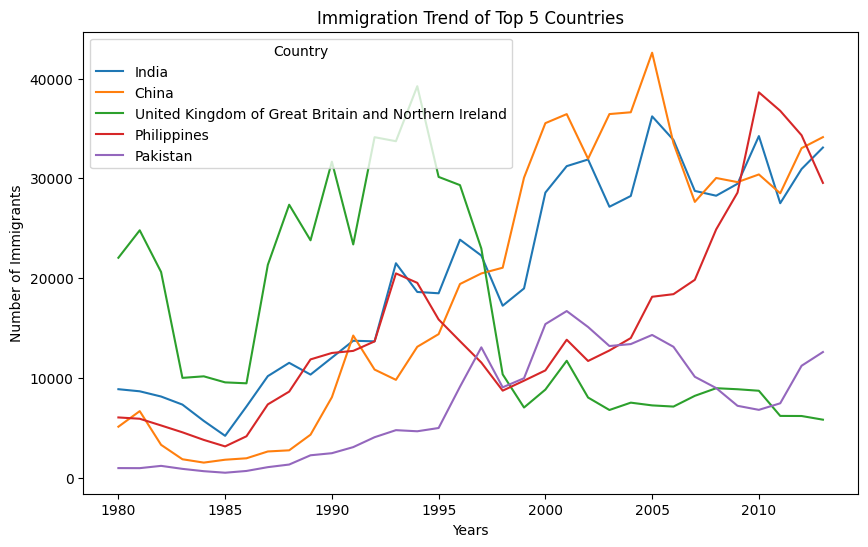

In [59]:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head(5)

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

#Step 2: Plot the dataframe. To make the plot more readeable, we will change the size using the `figsize` parameter.
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='line', figsize=(10, 6)) # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

<Axes: xlabel='Continent'>

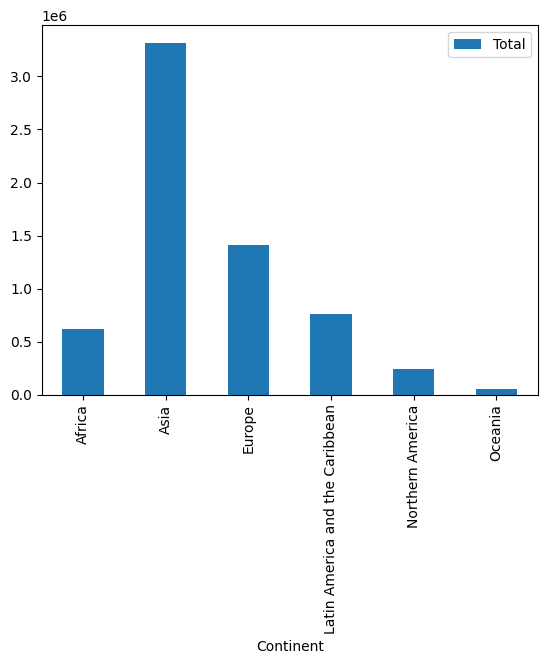

In [62]:
df_total = df_can[["Continent", "Total"]]
df_total.groupby("Continent").sum().plot(kind="bar")